#Importing Libraries

In [2]:
from sqlalchemy.sql.expression import column
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from time import process_time
# importing drive to get dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# decorator
def line():
  print()
  print("_"*80)
  print()

#Read data

In [4]:
indexes=range(188)
df_train=pd.read_csv('/content/drive/MyDrive/mitbih_train.csv',names=indexes)
df_test=pd.read_csv('/content/drive/MyDrive/mitbih_test.csv',names=indexes)
# df_train.head()
df_train=df_train.fillna(0)
df_test=df_test.fillna(0)
print(df_train.head())
line()
print(df_test.head())

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

#Splitting data

In [5]:
# splitting dataas input & output
x_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]
x_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]

#Plotting Data

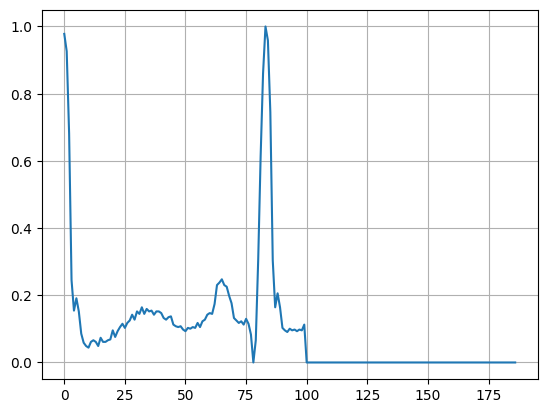

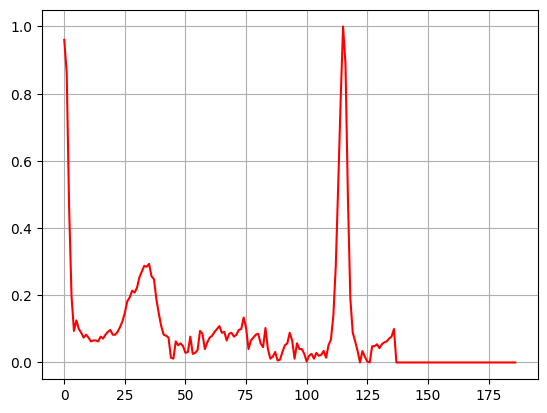

In [6]:
plt.grid()
plt.plot(x_train.iloc[0,:])
plt.show()
plt.grid()
plt.plot(x_train.iloc[1,:],c='r')
plt.show()

#Logistic Regression

In [7]:
# 1 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model=LogisticRegression()
st= process_time()
model.fit(x_train , y_train)
end= process_time()
t1 = end-st
yp = model.predict(x_test)
score1 = r2_score(y_test,yp)
loss1 = mean_squared_error(y_test,yp)
print("By using Logistic Regression\n\n",
      "r2 score:",score1,
      "\nloss function: ",loss1,
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp))


By using Logistic Regression

 r2 score: 0.6588969005075522 
loss function:  0.44596199524940616 

Confusion Matrix
 [[17838    25   200    15    40]
 [  327   197    32     0     0]
 [  905    11   478    26    28]
 [  107     0     8    47     0]
 [  186     0    22     0  1400]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Support Vector Machine SVM

In [14]:
# 2 Suuport Vector Machine SVM
from sklearn import svm
model = svm.SVC()
st= process_time()
model.fit(x_train , y_train)
end= process_time()
t2 = end-st
yp = model.predict(x_test)
score2 =r2_score(y_test,yp)
loss2  =mean_squared_error(y_test,yp)
print("By using Support Vector Machine SVM\n\n",
      "r2 score:",score2,
      "\nloss function: ",loss2,
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp))

By using Support Vector Machine SVM

 r2 score: 0.8619236454784233 
loss function:  0.18052256532066507 

Confusion Matrix
 [[18086    10    17     1     4]
 [  237   314     5     0     0]
 [  170     2  1249    25     2]
 [   71     0    13    78     0]
 [  135     0     8     0  1465]]


#Decision Tree

In [15]:
# 3 Decision Tree
from sklearn import tree
model = tree.DecisionTreeClassifier()
st= process_time()
model.fit(x_train , y_train)
end= process_time()
t3 = end-st
yp = model.predict(x_test)
score3 =r2_score(y_test,yp)
loss3 =mean_squared_error(y_test,yp)
print("By using Decision Tree\n\n",
      "r2 score:",score3,
      "\nloss function: ",loss3,
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp))

By using Decision Tree

 r2 score: 0.8302695014509565 
loss function:  0.22190754613557465 

Confusion Matrix
 [[17683   175   141    54    65]
 [  189   355     9     1     2]
 [  153    16  1236    25    18]
 [   41     0    16   103     2]
 [   71     5    20     0  1512]]


#Plotting Decision Tree

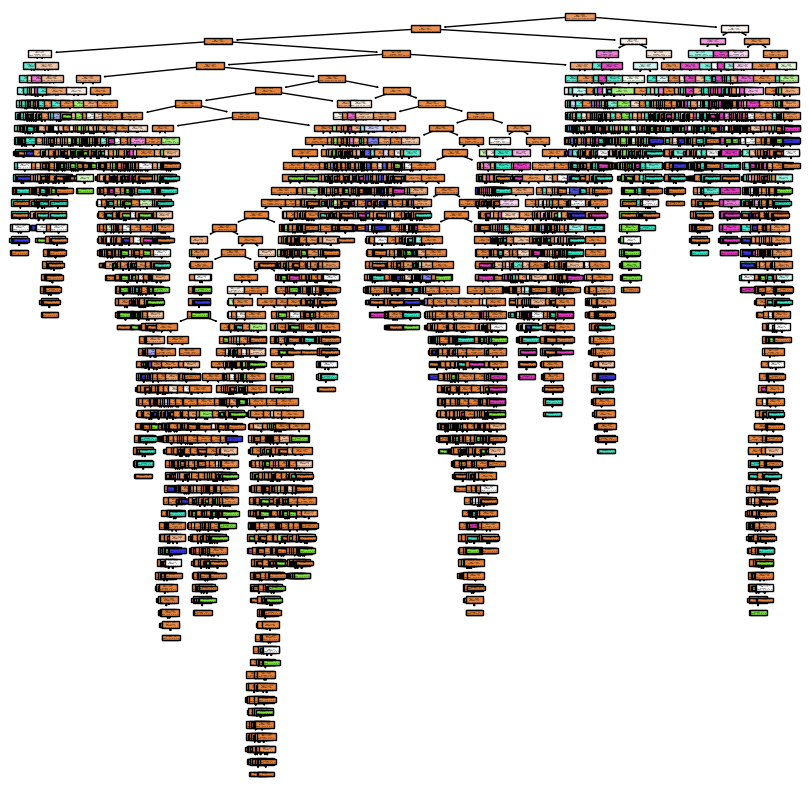

In [10]:
plt.figure(figsize=(10,10))
tree.plot_tree(model,filled=True)
plt.show()

#Random Forest

In [16]:
# 4 Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
st= process_time()
model.fit(x_train , y_train)
end= process_time()
t4 = end-st
yp = model.predict(x_test)
score4 =r2_score(y_test,yp)
loss4 =mean_squared_error(y_test,yp)
print("By using Random Forest\n\n",
      "r2 score:",score4,
      "\nloss function: ",loss4,
      "\n\nConfusion Matrix\n",confusion_matrix(y_test,yp))

By using Random Forest

 r2 score: 0.8998666922928039 
loss function:  0.13091540288689932 

Confusion Matrix
 [[18101     6     9     0     2]
 [  217   337     1     0     1]
 [  152     0  1277    14     5]
 [   51     0    12    99     0]
 [   90     0     3     0  1515]]


#Best Practice Table

In [22]:
info={
    "Algorithm Name":["Logistic Regression","Support Vector Machine SVM","Decision Tree","Random Forest"],
    "r2 Score":[score1,score2,score3,score4],
    "Loss Function":[loss1,loss2,loss3,loss4],
    "Fitting Time in second":[str(round(t1,3))+'s',str(round(t2,3))+'s',str(round(t3,3))+'s',str(round(t4,3))+'s']
}

info_df=pd.DataFrame(info)
info_df

,Algorithm Name,r2 Score,Loss Function,Fitting Time in second
0,Logistic Regression,0.658897,0.445962,18.851s
1,Support Vector Machine SVM,0.861924,0.180523,185.107s
2,Decision Tree,0.830270,0.221908,44.388s
3,Random Forest,0.899867,0.130915,152.265s
